# Data Science Internship under LGM
## Level: Intermediate
## Prediction using Decission Tree Algorithm
## Task: Create Decission Tree Classifier and Visualize it graphically

## Author:- Piyush Kumar

In [1]:
## Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\KRISHNA PRAJAPATI\Desktop\Lets Grow More(Internship)\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info() # To get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe() # To get the Statistical information 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Visualizing Iris Dataset

<Figure size 720x360 with 0 Axes>

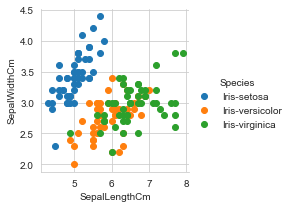

In [6]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.FacetGrid(data=data,hue="Species")\
.map(plt.scatter,"SepalLengthCm","SepalWidthCm")\
.add_legend()
plt.show()

By looking the scatterplot ,we can say that blue_points(iris_setosa) is seperated  perfectly  
as compare to organe_points(iris_versicolor) or green_points(iris_virginica).

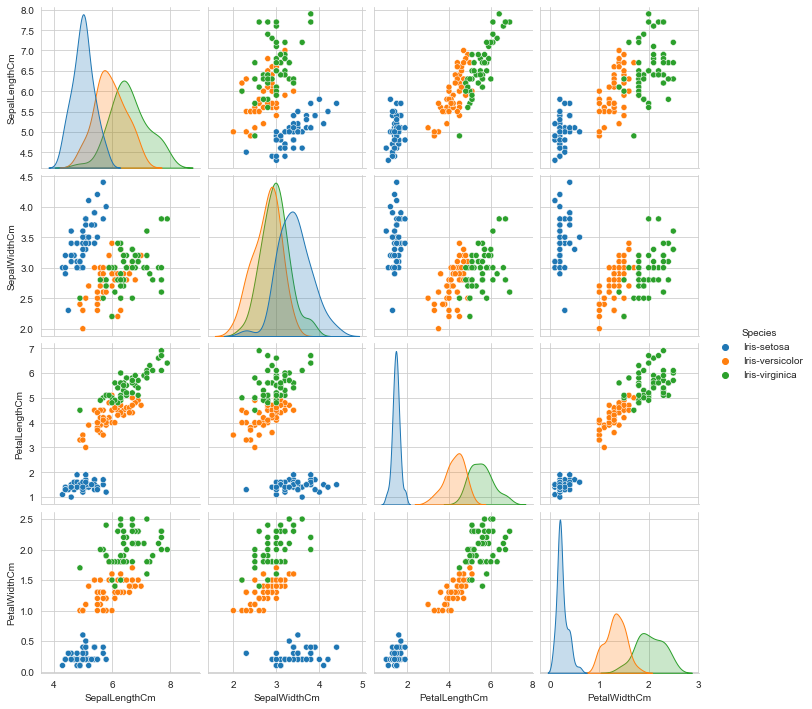

In [7]:
## Pairplot gives the correct relationship between all feature distribution
sns.pairplot(data.drop(["Id"],axis=1),hue="Species")
plt.show()

By looking the result of pair plot we sure that all blue points are well separated with other
two classes.But Versicolor and virginica are partially overlapping with each other.

In pair plot we saw that there are some feature combination which has very less overlapping 
b/w Versicolor and virginica,that’s means those feature are very important for 
our classification task purpose.

### Exploring some more features 

In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data["sepal_diff"]=data["SepalLengthCm"]-data["SepalWidthCm"]
data["Petal_diff"]=data["PetalLengthCm"]-data["PetalWidthCm"]
data["sl_pl_diff"]=data["SepalLengthCm"]-data["PetalLengthCm"]
data["sl_pw_diff"]=data["SepalLengthCm"]-data["PetalWidthCm"]
data["sw_pl_diff"]=data["SepalWidthCm"]-data["PetalLengthCm"]
data["sw_pw_diff"]=data["SepalWidthCm"]-data["PetalWidthCm"]

In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_diff,Petal_diff,sl_pl_diff,sl_pw_diff,sw_pl_diff,sw_pw_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,4.9,2.1,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,4.7,1.6,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,4.5,1.9,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,4.4,1.6,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,4.8,2.2,3.4


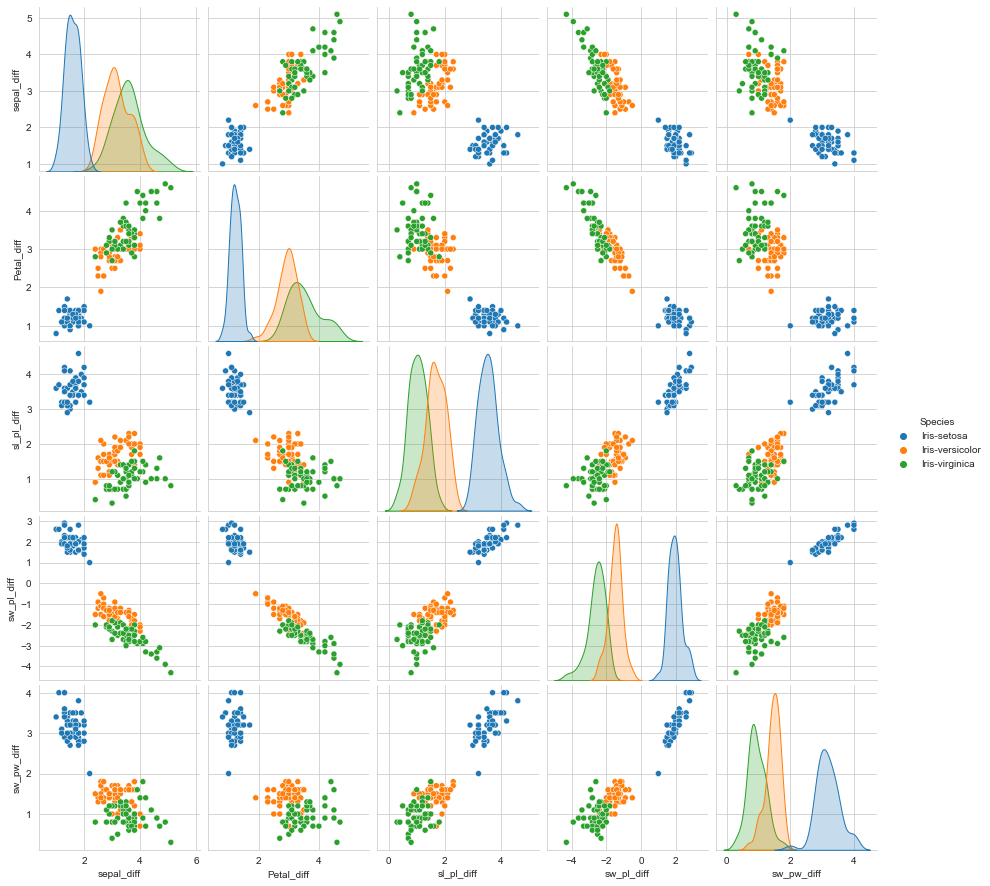

In [11]:
sns.pairplot(data[["Species","sepal_diff","Petal_diff","sl_pl_diff",\
                   "sw_pl_diff","sw_pw_diff"]],hue="Species")
plt.show()

With help of Pair plot we are getting some new information but it is more likely similar with our main data features as we saw earlier.
Every combination well separate the Iris-setosa but has some overlapped b/w Versicolor and virginica

## Preapring the Dataset for Model Building

In [12]:
x=data.drop(["Species","Id"],axis=1)
y=data["Species"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,sepal_diff,Petal_diff,sl_pl_diff,sl_pw_diff,sw_pl_diff,sw_pw_diff
61,5.9,3.0,4.2,1.5,2.9,2.7,1.7,4.4,-1.2,1.5
92,5.8,2.6,4.0,1.2,3.2,2.8,1.8,4.6,-1.4,1.4
112,6.8,3.0,5.5,2.1,3.8,3.4,1.3,4.7,-2.5,0.9
2,4.7,3.2,1.3,0.2,1.5,1.1,3.4,4.5,1.9,3.0
141,6.9,3.1,5.1,2.3,3.8,2.8,1.8,4.6,-2.0,0.8


In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [16]:
model.fit(x_train,y_train) # Training the model

DecisionTreeClassifier()

In [17]:
y_pred=model.predict(x_test)

In [18]:
print("Training Score",model.score(x_train,y_train))

Training Score 1.0


### Visualizing the decision tree

[Text(372.0, 391.392, 'sl_pw_diff <= 1.9\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris_virginica'),
 Text(297.6, 304.416, 'SepalWidthCm <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris_virginica'),
 Text(148.8, 217.44, 'PetalLengthCm <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris_Versicolor'),
 Text(74.4, 130.464, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris_Versicolor'),
 Text(223.20000000000002, 130.464, 'sl_pl_diff <= -1.7\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris_virginica'),
 Text(148.8, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris_virginica'),
 Text(297.6, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris_Versicolor'),
 Text(446.40000000000003, 217.44, 'sepal_diff <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris_virginica'),
 Text(372.0, 130.464, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = Iris_virginica'),
 Text(520.

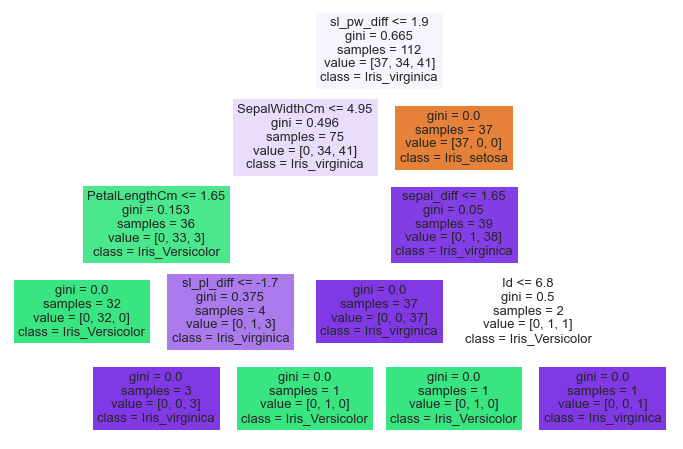

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model,feature_names=data.columns,class_names=["Iris_setosa","Iris_Versicolor",
                                        "Iris_virginica"],filled=True)

### Evaluating the accurracy of the model

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [21]:
print("Confusion_Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion_Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [22]:
print("Accurracy_Score:\n",accuracy_score(y_test,y_pred))

Accurracy_Score:
 0.9736842105263158


In [23]:
print("Classification_report:\n",classification_report(y_test,y_pred))

Classification_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Thank you